In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import scipy.stats as stats
%matplotlib inline
import nltk
from nltk.collocations import *
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

height has been deprecated.



In [17]:
# Import data

raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)

### Data
Data was acuired from the UCI Machine Learning Repository and contains sentences taken from Amazon reviews that are labeled as having either a positive(1) or negative(0) sentenment.  There are 1000 rows of data.  Data from IMDB reviews was also acquired from the same source to use for testing.

link : https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

In [18]:
# See number of rows in dataset.
len(raw_data)

1000

In [19]:
# Create empty dataframe
data = []

In [20]:
# See raw data
raw_data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [21]:
# Create working copy of data
data = raw_data
#

In [22]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [23]:
# Rename columns
data.columns=["sentence","sentiment"]

In [24]:
#Convert sentences to lowercase
data["sentence"] = data["sentence"].str.lower()

In [25]:
def cleaner():
    data['sentence'] = data['sentence'].str.replace('.', ' ')
    data['sentence'] = data['sentence'].str.replace(',', ' ')
    data['sentence'] = data['sentence'].str.replace('!', ' ')
    data['sentence'] = data['sentence'].str.replace("'", ' ')
    data['sentence'] = data['sentence'].str.replace('?', ' ')
    data['sentence'] = data['sentence'].str.replace('*', ' ')
    data['sentence'] = data['sentence'].str.replace('"', ' ')
    data['sentence'] = data['sentence'].str.replace('"', ' ')
    data['sentence'] = data['sentence'].str.replace('-', ' ')
    data['sentence'] = data['sentence'].str.replace('(', ' ')
    data['sentence'] = data['sentence'].str.replace(')', ' ')
    data['sentence'] = data['sentence'].str.replace(':', ' ')
    data['sentence'] = data['sentence'].str.replace('/', ' ')

In [26]:
def model(keywords):
    raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)
    data = []
    data = raw_data
    data.columns=["sentence","sentiment"]
    cleaner()
    for key in keywords:        
        data[str(key)] = data.sentence.str.contains(' ' + str(key) + ' ',case=False)
    data["sentiment"] = (data["sentiment"] == 1)
    analysis_data = data[keywords]
    target = data["sentiment"]
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(analysis_data,target)
    y_pred= bnb.predict(analysis_data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
    t =confusion_matrix(target, y_pred)
    sensitivity =t[1][1]/((t[1][0])+(t[1][1]))
    print(("Sensitivity : %s") % (sensitivity))
    specificity = t[0][0]/((t[0][0])+(t[0][1]))
    print(("Specificity : %s") % (specificity))

In [ ]:
raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)
data = pd.DataFrame()
data = raw_data
data.columns=["sentence","sentiment"]
cleaner()
keywords = v5_keywords
for key in keywords:        
    data[str(key)] = data.sentence.str.contains(' ' + str(key) + ' ',case=False)
data["sentiment"] = (data["sentiment"] == 1)
analysis_data = data[keywords]
target = data["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(analysis_data,target)
y_pred= bnb.predict(analysis_data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
t =confusion_matrix(target, y_pred)
sensitivity =t[1][1]/((t[1][0])+(t[1][1]))
print(("Sensitivity : %s") % (sensitivity))
specificity = t[0][0]/((t[0][0])+(t[0][1]))
print(("Specificity : %s") % (specificity))

In [13]:
data= pd.DataFrame()

def model(keywords,data_source):
    data = pd.DataFrame()
    data = data_source
    data.columns=["sentence","sentiment"]
    #cleaner()
    for key in keywords:        
        data[str(key)] = data.sentence.str.contains(' ' + str(key) + ' ',case=False)
    data["sentiment"] = (data["sentiment"] == 1)
    analysis_data = data[keywords]
    target = data["sentiment"]
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(analysis_data,target)
    y_pred= bnb.predict(analysis_data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
    t =confusion_matrix(target, y_pred)
    sensitivity =t[1][1]/((t[1][0])+(t[1][1]))
    print(("Sensitivity : %s") % (sensitivity))
    specificity = t[0][0]/((t[0][0])+(t[0][1]))
    print(("Specificity : %s") % (specificity))

In [ ]:
data = pd.DataFrame()
data.head()

In [ ]:
raw_data = pd.DataFrame()

In [ ]:
data = pd.DataFrame()

#### Create Features

In order to create features I will look at which words are used most frequently in positive reviews.  As I look through the wordds I will decide which ones seem to be most likely associated with positive reviews, as opposed to used that are ambigious in their sentiment. 

In [44]:
# Create dataframes with separated positive and negeative data.
positive = data.loc[data["sentiment"]== 1]
negative = data.loc[data["sentiment"]== 0]

In [50]:
#Version 1

v1_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent"]

model(v1_keywords)

Number of mislabeled points out of a total 1000 points : 338
Sensitivity : 0.412
Specificity : 0.912


In [29]:
#Version 2

v2_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","poor","bad","worst"]

model(v2_keywords)

Number of mislabeled points out of a total 1000 points : 327
Sensitivity : 0.408
Specificity : 0.938


In [28]:
# Version 3 - Added more keywords
v3_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","poor","bad","worst","doesn't","waste","disappointed","unhappy","problem","but","money","terrible"]

model(v3_keywords)

Number of mislabeled points out of a total 1000 points : 327
Sensitivity : 0.406
Specificity : 0.94


In [40]:
# Version 4 - Removed features that don't benefit performance
v4_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

model(v4_keywords)


Number of mislabeled points out of a total 1000 points : 327
Sensitivity : 0.406
Specificity : 0.94


In [32]:
# Version 5 - Went through raw data, identified data is all related to phone reviews.  Added phone specific keywords, and a phrase.
v5_keywords = ["fast","slim","cool","beautiful","well made","best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

model(v5_keywords)


Number of mislabeled points out of a total 1000 points : 321
Sensitivity : 0.418
Specificity : 0.94


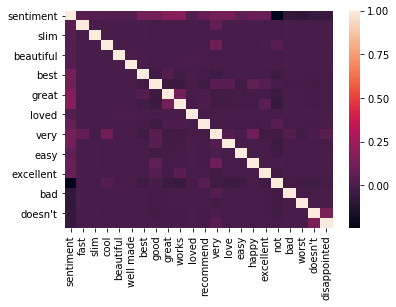

In [42]:
# Heatmap to see correlation between keywords for final version

raw_data_v5 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v5 = pd.DataFrame()
data_v5 = raw_data_v5
data_v5.columns=["sentence","sentiment"]
cleaner()
keywords = v5_keywords
for key in keywords:        
    data_v5[str(key)] = data_v5.sentence.str.contains(' ' + str(key) + ' ',case=False)
data_v5["sentiment"] = (data_v5["sentiment"] == 1)

sns.heatmap(data_v5.corr())

In [46]:
positive


,sentence,sentiment
1,good case excellent value,1
2,great for the jawbone,1
4,the mic is great,1
7,if you are razr owner you must have this,1
10,and the sound quality is great,1
11,he was very impressed when going from the orig...,1
13,very good quality though,1
15,highly recommend for any one who has a blue to...,1
17,so far so good,1
18,works great,1


In [45]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = positive.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count.tail(5)

it     145.0
i      186.0
and    189.0
the    239.0
       814.0
dtype: float64

In [48]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = negative.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count.tail()

and    122.0
it     166.0
i      193.0
the    280.0
       843.0
dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, y_pred_test)

Version 5 appears to work the best.  The first keywords that I added first due to appear most frequently throughout the dataset had the most impact.  Towards the end as I was combing closer and closer through the data there was only incremental benefit as I added keywords.  There was also great benefit in cleaning up the data by converting all of the sentences to lower case and also stripping out punctuation.  One area I would like to explore further is the benefits of being able to find the most common phrases and adding them to the keywords.